In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import copy as cp
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, cross_val_predict 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import confusion_matrix, accuracy_score

from typing import Tuple

In [2]:
data = pd.read_csv('../../Data/grade_feat_scaled.csv')
data.head(5)

,grade,loan_status_bin
0,0.196276,0.0
1,0.196276,0.0
2,-0.575883,0.0
3,2.512753,0.0
4,0.196276,0.0


In [3]:
data.loan_status_bin.value_counts()
#0 = Loan Fully Paid
#1 = Loan Defaulted

0.0    1076751
1.0     268559
Name: loan_status_bin, dtype: int64

In [4]:
X = data.drop('loan_status_bin', axis=1)
X.shape

(1345310, 1)

In [5]:
y = data['loan_status_bin']

In [8]:
lr1 = LogisticRegression()

In [11]:
steps = [('model', lr1)]
pipeline = Pipeline(steps=steps)

In [14]:
#Accuracy:

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
print(scores)

score = np.mean(scores)
print(score)

[0.7981692  0.79787187 0.79770462 0.79836246 0.79828441]
0.7980785097858487


In [23]:
#Aggregated Confusion Matrix From RepeatedStratifiedKFold: 
y_pred = cross_val_predict(pipeline, X, y, cv=cv, n_jobs=-1)
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[1054612,   22139],
       [ 249508,   19051]])

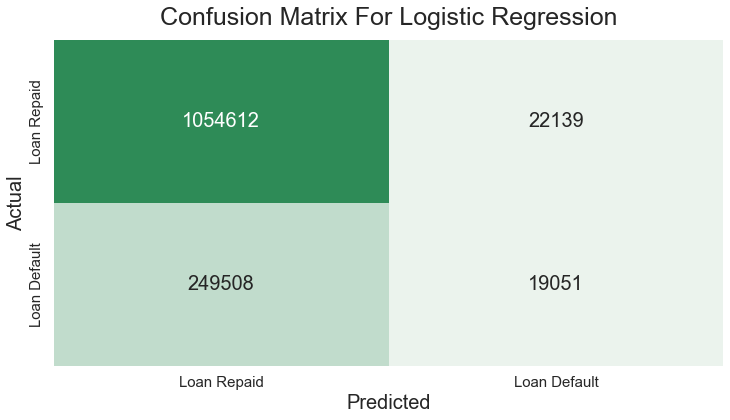

In [72]:
sns.set(rc = {'figure.figsize':(12,6)})
#cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
cmap = sns.light_palette('seagreen', as_cmap=True)

res = sns.heatmap(conf_mat, annot=True, fmt='d', annot_kws={"size":20},
#            xticklabels = ['Good = Paid In Full', 'Bad = Default'],
#            yticklabels = ['Loan Paid In Full', 'Bad = Default'], 
            cmap=cmap, cbar=False)

res.set_xticklabels(['Loan Repaid', 'Loan Default'], fontsize=15)
res.set_yticklabels(['Loan Repaid', 'Loan Default'], fontsize=15)


plt.title('Confusion Matrix For Logistic Regression', fontsize=25, pad=15)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20);

In [74]:
accuracy_score(y, y_pred)

0.7980785097858486

In [97]:
TN, FP, FN, TP = conf_mat.ravel()
print(TP)
print(FP)
print(FN)
print(TN)
print((TP + TN) / (TN + TP + FP + FN))

19051
22139
249508
1054612
0.7980785097858486


In [95]:
#Re-examine original pool of accepted LC Loans: 

print(data.loan_status_bin.value_counts())
#0 = Loan Fully Paid
#1 = Loan Defaulted

good_loan = data.loan_status_bin.value_counts()[0]
bad_loan = data.loan_status_bin.value_counts()[1]

print()
print(good_loan / (good_loan + bad_loan))

#Random investment into accepted loans would give us 80% chance of pickkng a good loan

0.0    1076751
1.0     268559
Name: loan_status_bin, dtype: int64

0.8003738915194267


In [99]:
#Negative Predictive Value
#Logistic model does not do better than Null Model (or Randomly choosing an investment)
TN / (TN + FN)

0.8086771156028586

In [12]:
#Recall

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='recall', cv=cv, n_jobs=-1) 

print(scores)
score = np.mean(scores)
print(score)

[0.07099104 0.07102696 0.07030086 0.07167858 0.07069184]
0.07093785742867391
